# Loan Application Status Prediction

### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


# Introduction

In this my notebook, I will be using  Machine Learning Algorithms to implement the predictions.

In [1]:
#Importing Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\loan_prediction.csv")
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.shape

(614, 13)

So, here we have 614 data and 13 columns 

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we have 4 float data ,1 int data and rest of data are objects

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


LoanAmount,Loan_Amount_Term, Credit_History have nulls values

### DATA PREPROCESSING

In [7]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


above we get idea about in details in type and total number of data

In [8]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

<AxesSubplot:>

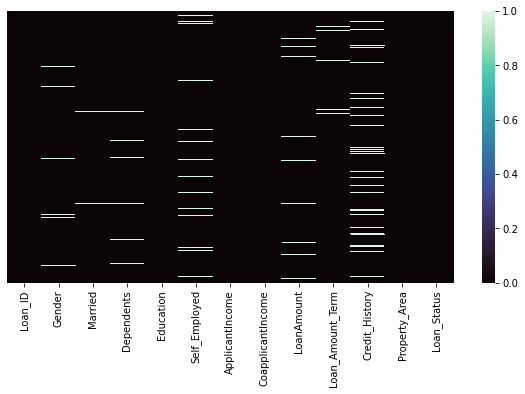

In [9]:
#check for missing values:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='mako')

### EXPLORATORY DATA ANALYSIS

In [10]:
df.Loan_Status.replace(['N', 'Y'], [0,1], inplace = True) 
df.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [23]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,614,601,611,599,614,582,614
unique,614,2,2,4,2,2,3
top,LP002837,Male,Yes,0,Graduate,No,Semiurban
freq,1,489,398,345,480,500,233


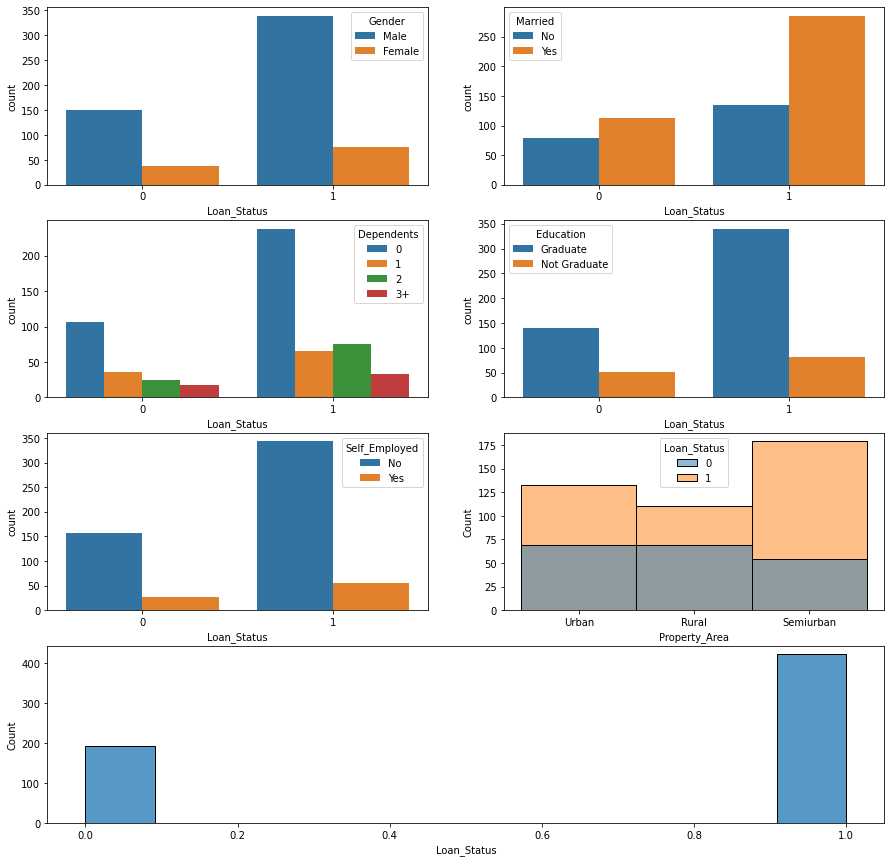

In [15]:
fig, axs = plt.subplots(4,2, figsize=(15,15))

sns.countplot(ax=axs[0,0], x="Loan_Status",hue="Gender",data=df)
sns.countplot(ax=axs[0,1], x="Loan_Status",hue="Married",data=df)
sns.countplot(ax=axs[1,0], x="Loan_Status",hue="Dependents",data=df)
sns.countplot(ax=axs[1,1], x="Loan_Status",hue="Education",data=df)
sns.countplot(ax=axs[2,0], x="Loan_Status",hue="Self_Employed",data=df)
sns.histplot(ax=axs[2,1], x="Property_Area", hue="Loan_Status", data=df)

ax1=plt.subplot(414)
sns.histplot(ax=ax1, x="Loan_Status", data=df)

plt.show()

<AxesSubplot:>

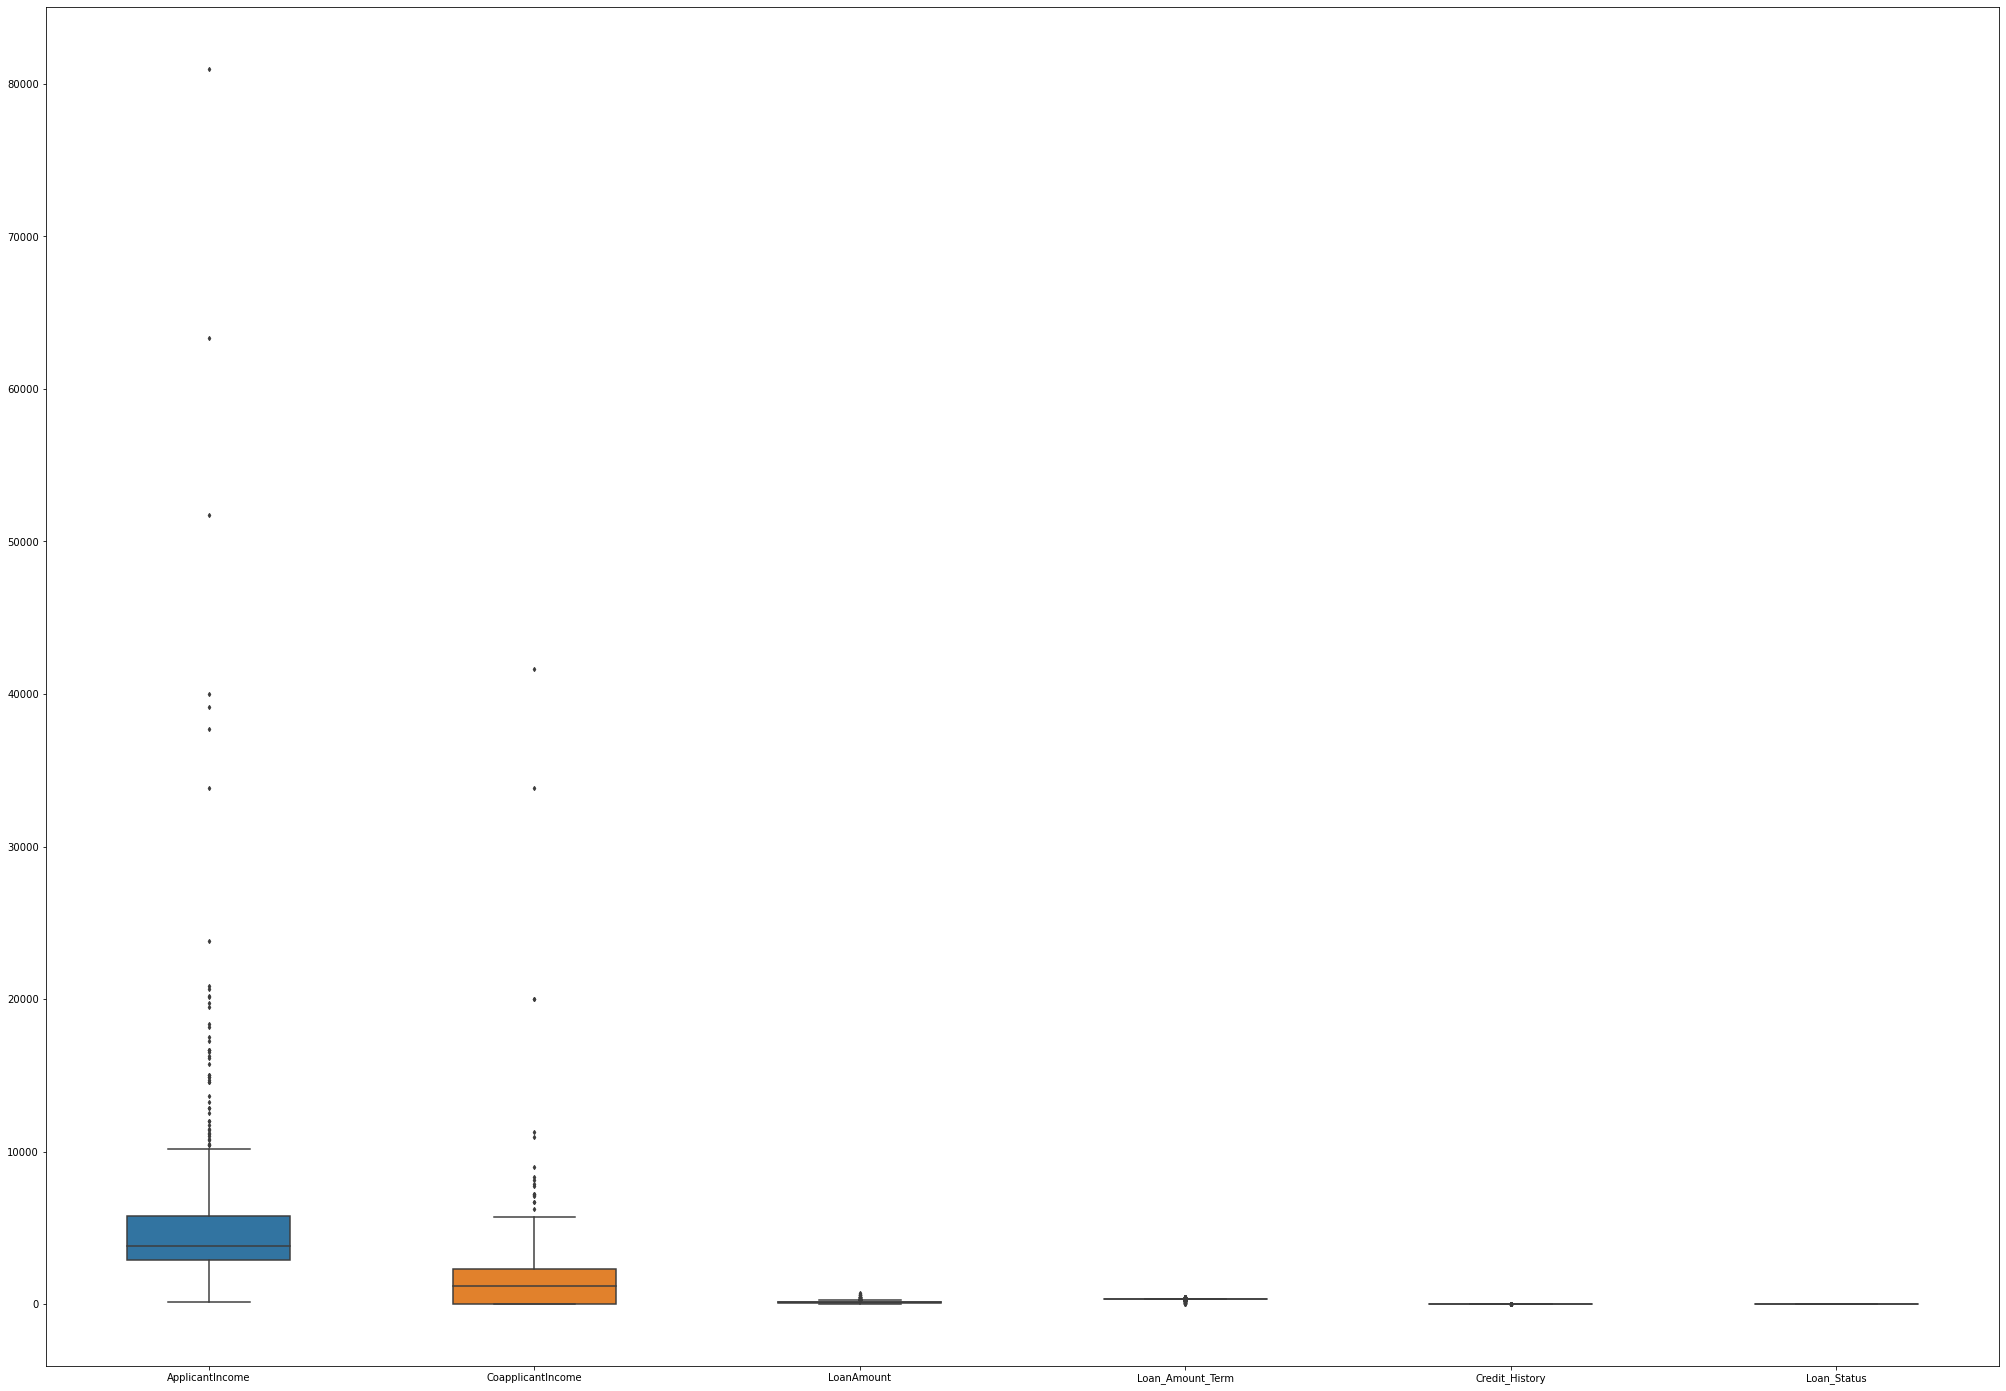

In [17]:
fig ,ax =plt.subplots(figsize=(35,25))
sns.boxplot(data=df,width =0.5,ax=ax ,fliersize=3)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

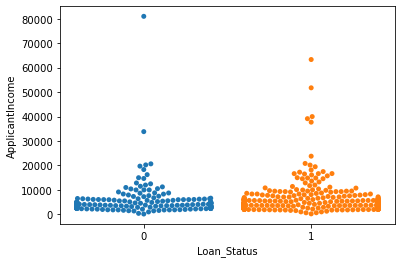

In [18]:
sns.swarmplot(x="Loan_Status",y="ApplicantIncome",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

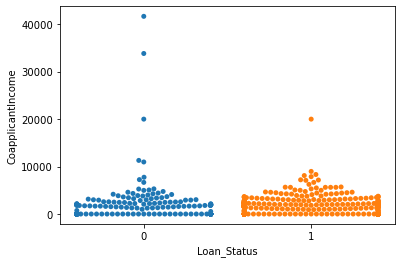

In [19]:
sns.swarmplot(x="Loan_Status",y="CoapplicantIncome",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

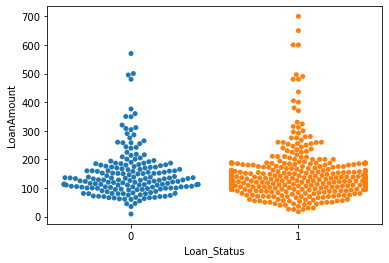

In [20]:

sns.swarmplot(x="Loan_Status",y="LoanAmount",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

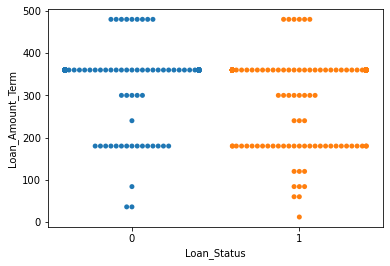

In [21]:
sns.swarmplot(x="Loan_Status",y="Loan_Amount_Term",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

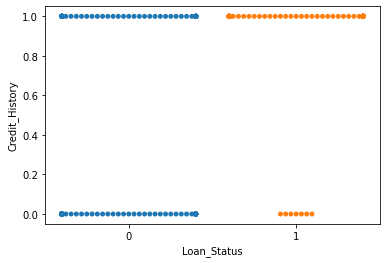

In [22]:
sns.swarmplot(x="Loan_Status",y="Credit_History",data=df)

In [24]:
x= df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

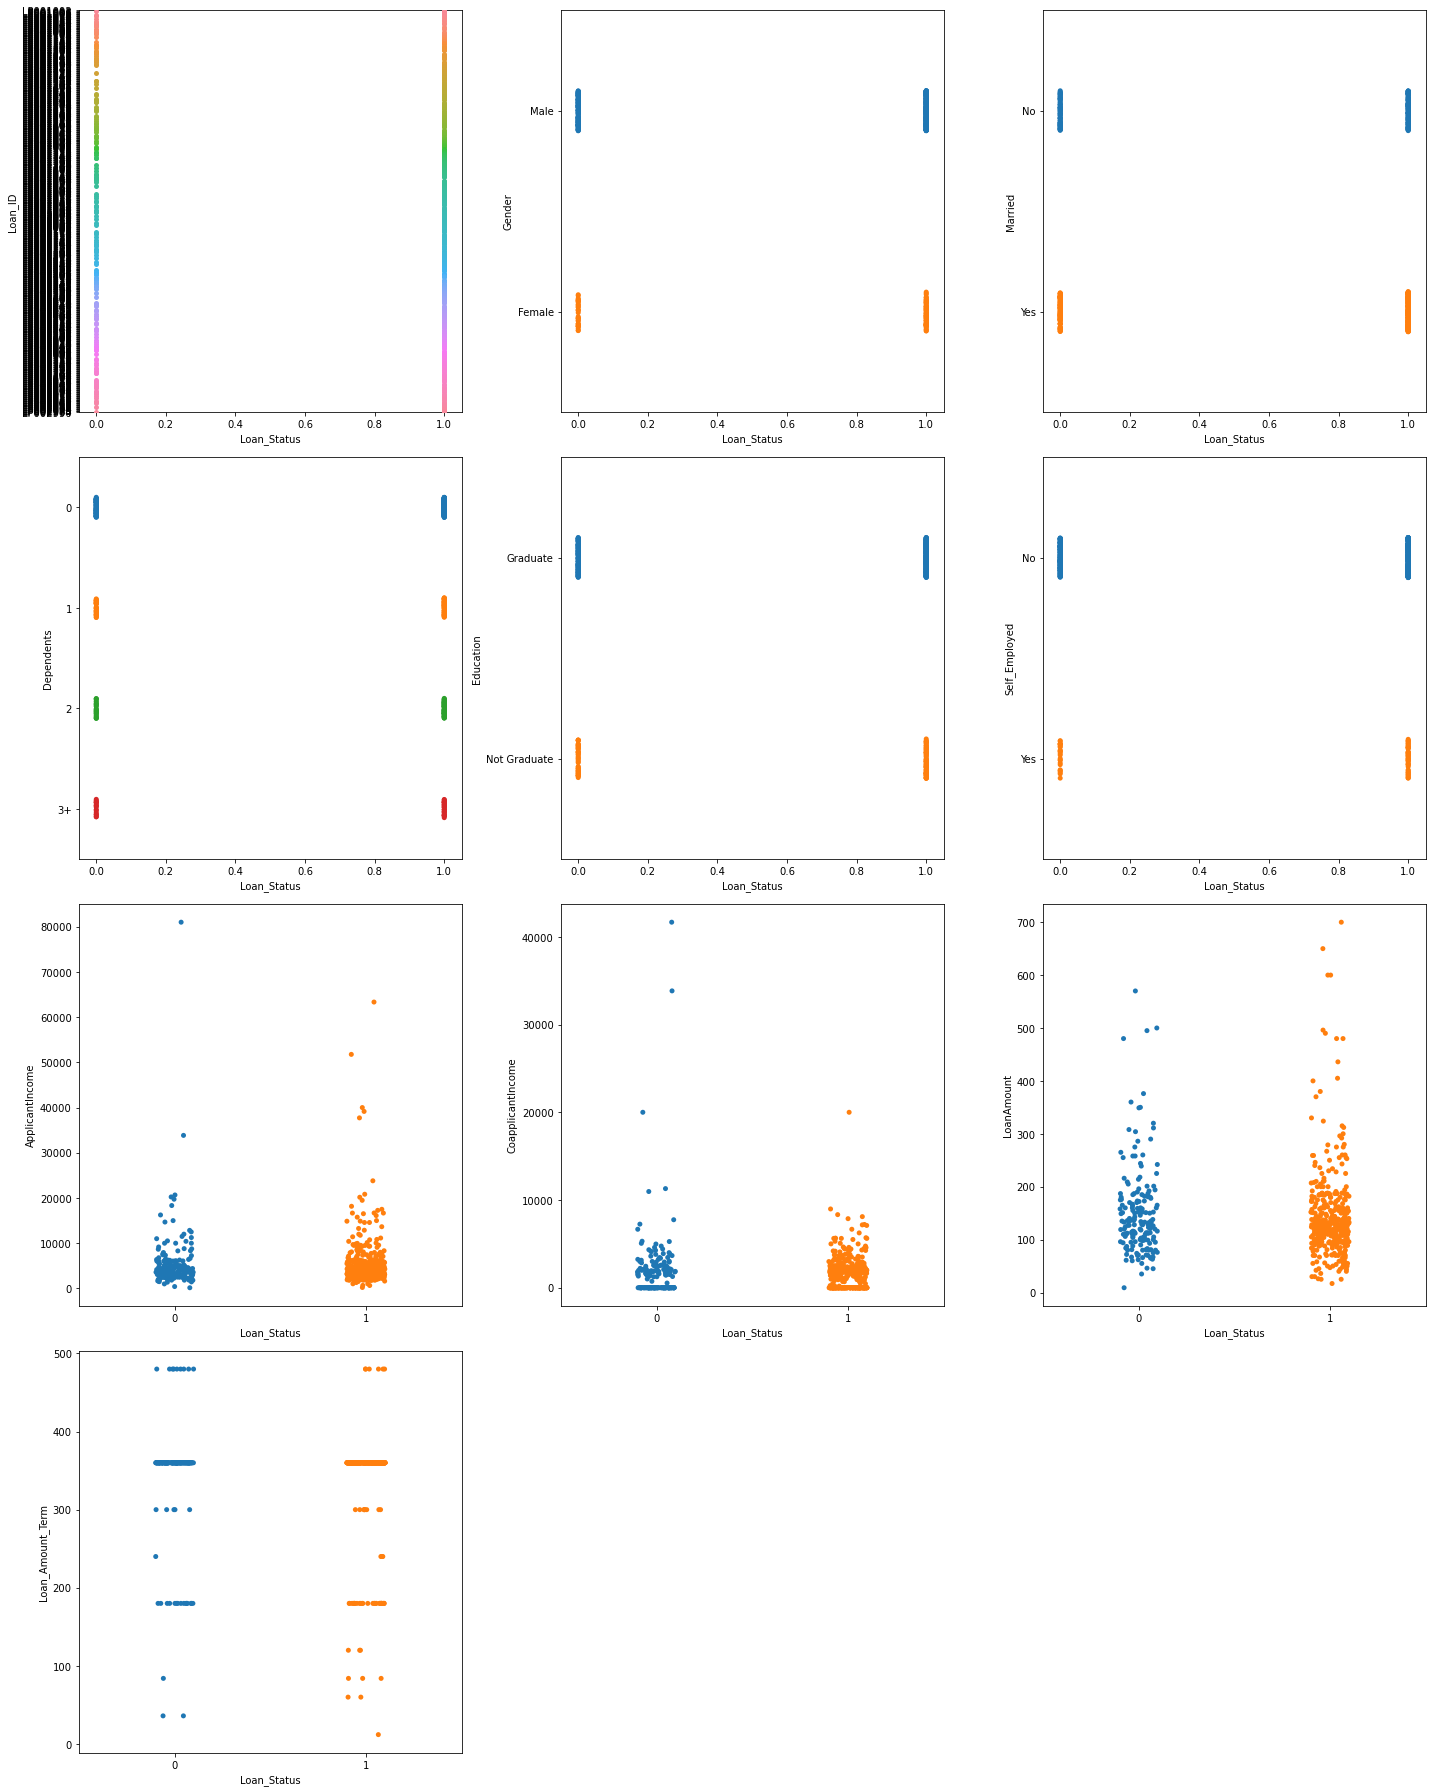

In [25]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber <=10:
      ax=plt.subplot(4,3,plotnumber)
      sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

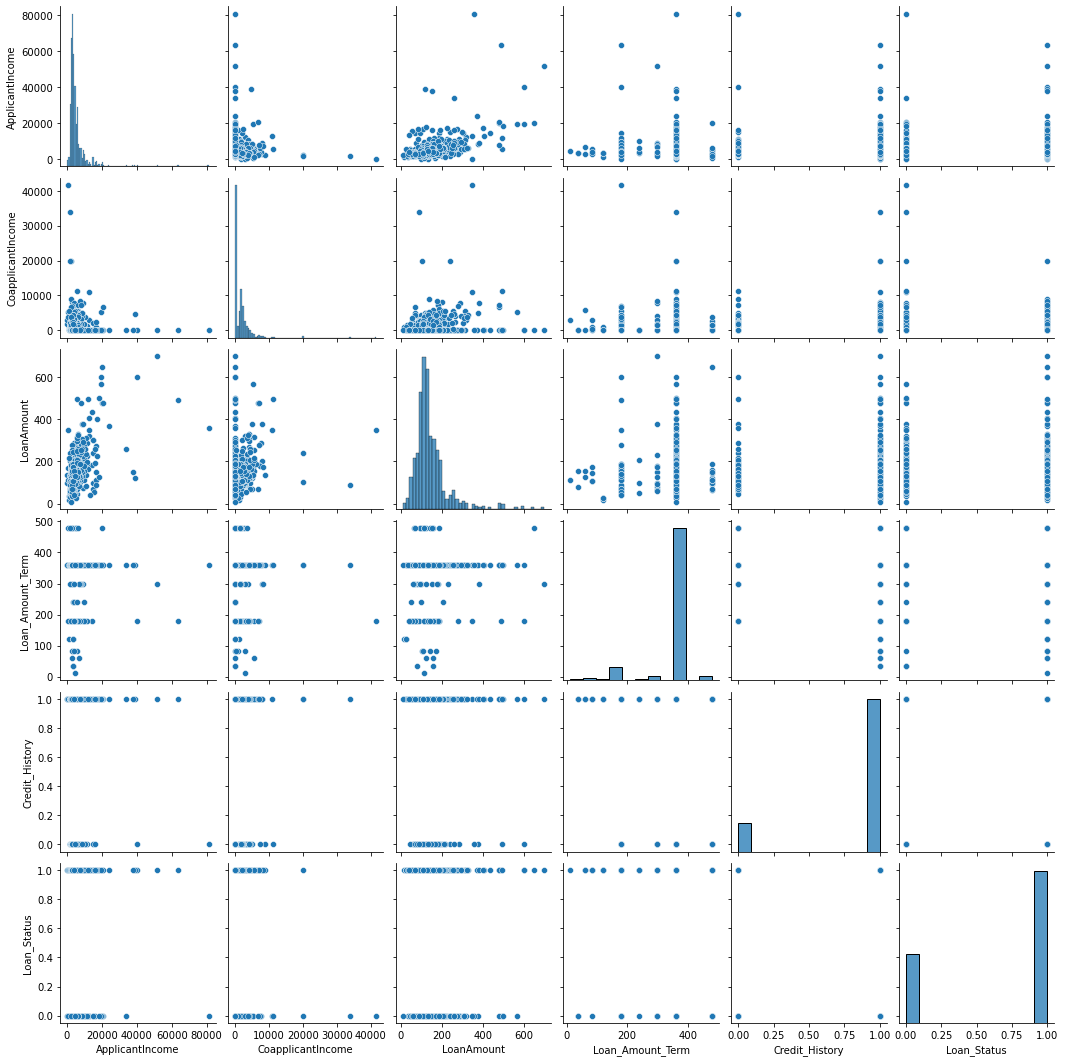

In [26]:
sns.pairplot(df)

<AxesSubplot:>

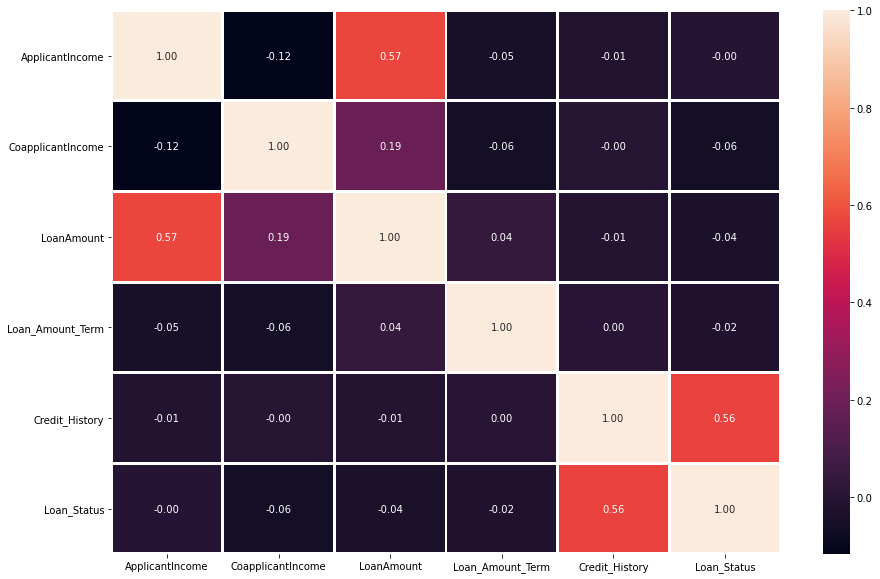

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [28]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [30]:
feature_cols=df.columns[:17]
 
X=df[feature_cols]

result_cols= df.columns[1:]

Y=df[result_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 13)
(429, 12)
(185, 13)
(185, 12)


In [52]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace=True)

X_train=df.drop(columns=['Loan_ID'])

Y_train=df['Loan_Status']
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [53]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

X_train['Married']=le.fit_transform(X_train[['Married']])
X_train['Gender']=le.fit_transform(X_train[['Gender']])
X_train['Dependents']=le.fit_transform(X_train[['Dependents']])
X_train['Education']=le.fit_transform(X_train[['Education']])
X_train['Self_Employed']=le.fit_transform(X_train[['Self_Employed']])
X_train['Property_Area']=le.fit_transform(X_train[['Property_Area']])


X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [54]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

### decision tree

In [57]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=DecisionTreeClassifier()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))



Accuracy: 1.0
F1: 1.0


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.2)

clf=RandomForestClassifier(n_estimators=30)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 1.0
F1: 1.0


### naive bayes gaussian

In [60]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=GaussianNB()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 0.9945945945945946
F1: 0.996309963099631


### LogisticRegression with lasso

In [64]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=LogisticRegression(penalty="l1",solver='liblinear', random_state=1)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 1.0
F1: 1.0



### LogisticRegression with ridge

In [63]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=LogisticRegression(penalty="l2",solver='liblinear', random_state=1)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 0.9945945945945946
F1: 0.996282527881041


### Gradient Boosting

In [62]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=GradientBoostingClassifier()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 1.0
F1: 1.0
